In [47]:
import numpy as np
import pandas as pd
from util import slot_to_time, plot_line,  get_airport_info, get_delay_time

color1 = ["#2878b5", "#9ac9db", "#f8ac8c", "#c82423", "#ff8884"]
color2 = ["#4878d0", "#d65f5f", "#6acc64", "#b47cc7", "#c4ad66", "gray"]
categories = ['Category A', 'Category B', 'Category C', 'Category D']

data1 = np.random.rand(len(categories))
data2 = np.random.rand(len(categories))
data3 = np.random.rand(len(categories))
data4 = np.random.rand(len(categories))
data5 = np.random.rand(len(categories))

horizons = range(0, len(data1), 1)

In [48]:
truth = np.load("../data/us_flight_data/udelay.npy")
print(truth.shape)  # [Airport, Time, Arr/Dep]

ASTGCN_arr = np.load("../saves/ASTGCN/arr/arr_25.npz")['predict']
ASTGCN_dep = np.load("../saves/ASTGCN/dep/dep_49.npz")['predict']
print(ASTGCN_arr.shape)  # [Time, Airport, predict]

GRU_arr = np.load("../saves/GRU/arr/arr_18.npz")['predict']
GRU_dep = np.load("../saves/GRU/dep/dep_15.npz")['predict']

LSTM_arr = np.load("../saves/LSTM/arr/arr_8.npz")['predict']

(70, 78912, 2)
(15758, 70, 12)


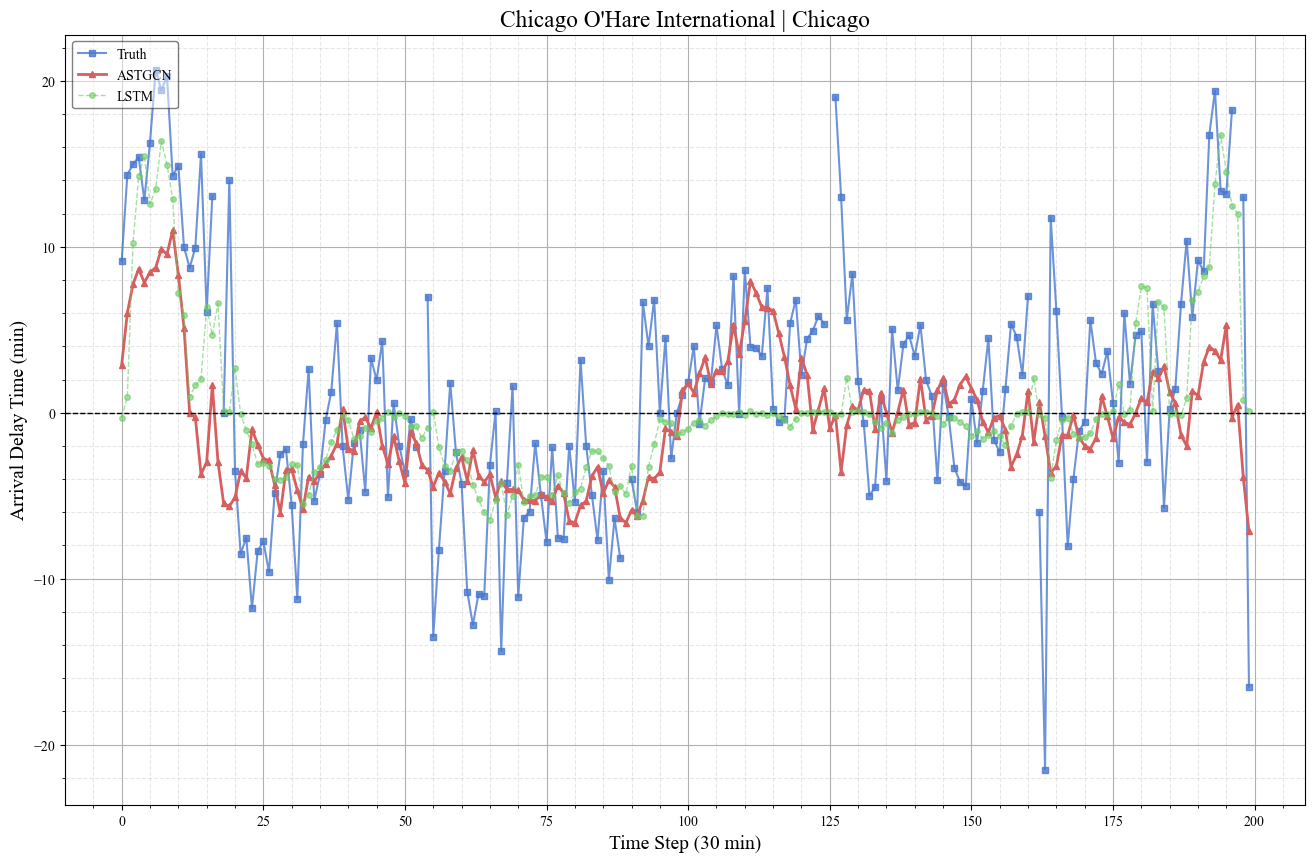

In [49]:
airport_idx = get_airport_info('ORD')['idx']
name = f"{get_airport_info('ORD')['AIRPORT']} | {get_airport_info('ORD')['CITY']}"
# airport_idx = 1
step = 6
length = 200

true_time_step = 47359
x_ax = range(0, length, 1)

arr_truth = truth[airport_idx, true_time_step:true_time_step+length, 0]
dep_truth = truth[airport_idx, true_time_step:true_time_step+length, 1]

ASTGCN_arr = ASTGCN_arr[:length, airport_idx, step]
ASTGCN_dep = ASTGCN_dep[:length, airport_idx, step]

GRU_arr = GRU_arr[:length, airport_idx, step]
GRU_dep = GRU_dep[:length, airport_idx, step]

LSTM_arr = LSTM_arr[:length, airport_idx, step]

plot_line(x_ax, arr_truth, ASTGCN_arr, LSTM_arr, data_name=['Truth',  'ASTGCN', 'LSTM'],
          colors=color2, title=name, y_name='Arrival Delay Time (min)', x_name='Time Step (30 min)', inset_ranges=None, width=1, size=4)

In [50]:
get_delay_time('DEN', 1)

{'idx': 3,
 'AIRPORT': 'Denver Intl',
 'CITY': 'Denver',
 'STATE': 'CO',
 'COUNTRY': 'USA',
 'LATITUDE': '39.85840806',
 'LONGITUDE': '-104.6670019',
 'Arrival Delay': 1.9579195,
 'Departure Delay': 12.637506,
 'Time': '2019-08-08 16:00'}

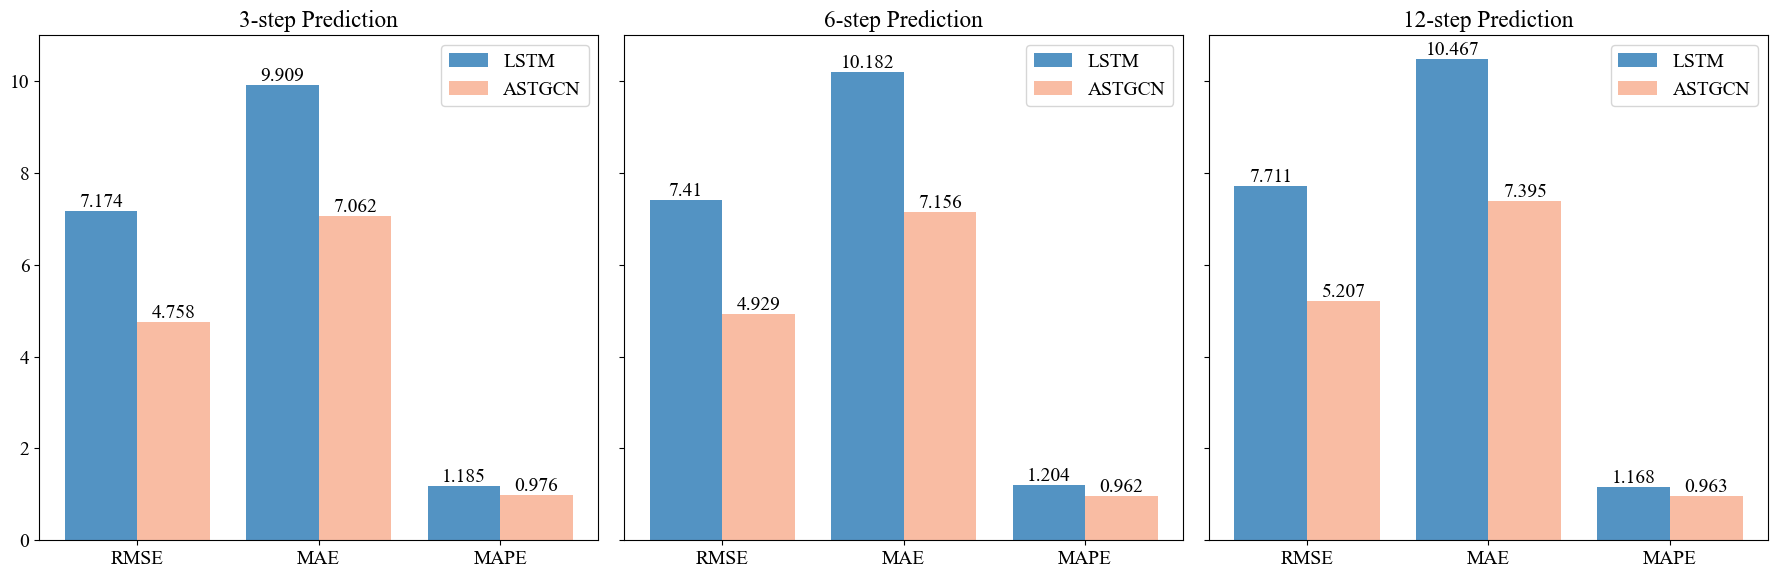

In [55]:
import matplotlib.pyplot as plt

# Data setup
steps = [3, 6, 12]
lstm_rmse = [7.174, 7.41, 7.711]
lstm_mae = [9.909, 10.182, 10.467]
lstm_mape = [1.185, 1.204, 1.168]

astgcn_rmse = [4.758, 4.929, 5.207]
astgcn_mae = [7.062, 7.156, 7.395]
astgcn_mape = [0.976, 0.962, 0.963]

# Creating a figure with subplots for each step
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Titles for each subplot
titles = ['3-step Prediction', '6-step Prediction', '12-step Prediction']

for i in range(3):
    # Positions of bars for the current step
    positions = [0, 1, 2]  # Positions for RMSE, MAE, MAPE

    # Bar charts for LSTM
    lstm_bars = axes[i].bar(positions, [lstm_rmse[i], lstm_mae[i], lstm_mape[i]], width=0.4, label='LSTM', alpha=0.8, color='#2878b5')
    # Bar charts for ASTGCN
    astgcn_bars = axes[i].bar([p + 0.4 for p in positions], [astgcn_rmse[i], astgcn_mae[i], astgcn_mape[i]], width=0.4, label='ASTGCN', alpha=0.8, color='#f8ac8c')

    # Adding labels on top of the bars
    for bar in lstm_bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
    for bar in astgcn_bars:
        yval = bar.get_height()
        axes[i].text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

    # Setting titles, labels
    axes[i].set_title(titles[i])
    axes[i].set_xticks([p + 0.2 for p in positions])
    axes[i].set_xticklabels(['RMSE', 'MAE', 'MAPE'])
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()